<a href="https://colab.research.google.com/github/ck7up/skillsforall/blob/ck7up-skillsforall/Exercice_Pr%C3%A9diction_des_pannes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Exercice : Prédiction des pannes
Description :
Vous disposez d'un ensemble de données de température collectées à partir de capteurs dans un système de refroidissement. Votre tâche est de créer un modèle prédictif pour anticiper les pannes potentielles en fonction des fluctuations de température.

Données :
Voici un extrait simplifié des données :

Temps	Température (en °C)
2023-12-01 08:00:00	15
2023-12-01 08:15:00	15
2023-12-01 08:30:00	16
...	...
Tâches à réaliser :
1. Importez les données dans un environnement Python (Pandas, par exemple).
2. Visualisez les données pour comprendre les fluctuations de température au fil du temps.
3. Divisez les données en ensembles d'entraînement et de test.
4. Utilisez un modèle de régression linéaire pour créer un modèle prédictif basé sur les données de température.
5. Évaluez les performances du modèle à l'aide de métriques appropriées (par exemple, R² ou MSE).
6. Utilisez le modèle pour prédire les températures futures et identifiez les cas où des températures anormales pourraient indiquer une panne potentielle.

#1.Importez les données dans un environnement Python (Pandas, par exemple).


In [2]:
import pandas as pd

# Charger les données depuis le fichier CSV
df = pd.read_csv('donnees_temperature.csv')

# Afficher les premières lignes pour vérifier l'importation
print(df.head())

                 Temps  Température
0  2023-12-01 08:00:00           15
1  2023-12-01 08:15:00           14
2  2023-12-01 08:30:00           16
3  2023-12-01 08:45:00           13
4  2023-12-02 09:00:00           18


#2. Visualisez les données pour comprendre les fluctuations de température au fil du temps.

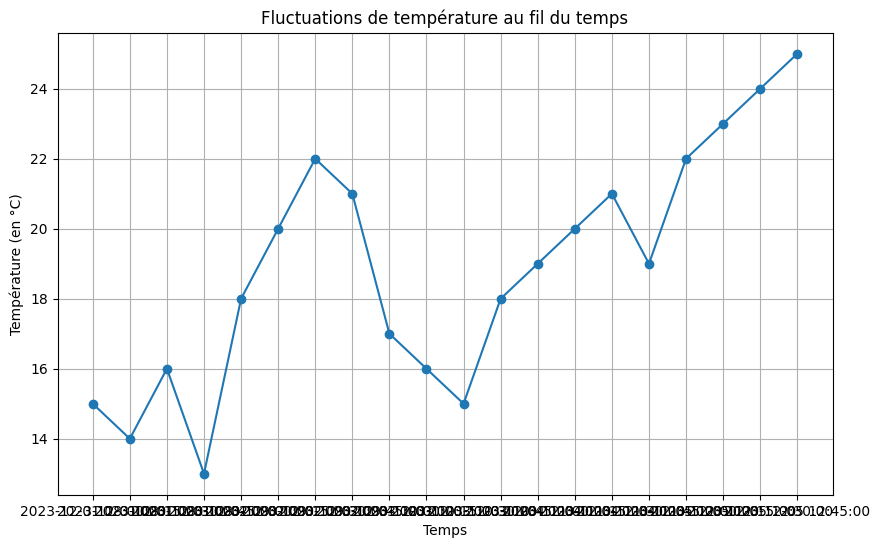

In [3]:
import matplotlib.pyplot as plt

# Charger les données depuis le fichier CSV
df = pd.read_csv('donnees_temperature.csv')

# Convertir la colonne 'Temps' en format de date si nécessaire
# df['Temps'] = pd.to_datetime(df['Temps']) # Utilisez cette ligne si 'Temps' n'est pas déjà au format de date

# Créer un graphique pour visualiser les fluctuations de température
plt.figure(figsize=(10, 6))
plt.plot(df['Temps'], df['Température'], marker='o')
plt.title('Fluctuations de température au fil du temps')
plt.xlabel('Temps')
plt.ylabel('Température (en °C)')
plt.grid(True)
plt.show()

#3. Divisez les données en ensembles d'entraînement et de test.

In [7]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Charger les données depuis le fichier CSV
df = pd.read_csv('donnees_temperature.csv')

# Supposons que vous avez une colonne 'Température' à prédire et d'autres caractéristiques à utiliser pour la prédiction
X = df.drop('Température', axis=1)  # Sélectionner les caractéristiques (features) pour l'entraînement
y = df['Température']  # Sélectionner la colonne à prédire

# Diviser les données en ensembles d'entraînement et de test (par exemple, 80% pour l'entraînement et 20% pour le test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Afficher les dimensions des ensembles pour vérification
print("Taille de l'ensemble d'entraînement X :", X_train.shape)
print("Taille de l'ensemble de test X :", X_test.shape)
print("Taille de l'ensemble d'entraînement y :", y_train.shape)
print("Taille de l'ensemble de test y :", y_test.shape)


Taille de l'ensemble d'entraînement X : (16, 1)
Taille de l'ensemble de test X : (4, 1)
Taille de l'ensemble d'entraînement y : (16,)
Taille de l'ensemble de test y : (4,)


#4. Utilisez un modèle de régression linéaire pour créer un modèle prédictif basé sur les données de température.


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.model_selection import train_test_split

# Charger les données depuis le fichier CSV
df = pd.read_csv('donnees_temperature.csv')

# Convertir la colonne 'Temps' en format datetime
df['Temps'] = pd.to_datetime(df['Temps'])

# Extraire les caractéristiques de date
df['Year'] = df['Temps'].dt.year
df['Month'] = df['Temps'].dt.month
df['Day'] = df['Temps'].dt.day
df['Hour'] = df['Temps'].dt.hour
df['Minute'] = df['Temps'].dt.minute
df['Second'] = df['Temps'].dt.second

# Supprimer la colonne 'Temps'
df.drop('Temps', axis=1, inplace=True)

# Supposons que vous avez une colonne 'Température' à prédire et d'autres caractéristiques à utiliser pour la prédiction
X = df.drop('Température', axis=1)  # Sélectionner les caractéristiques (features) pour l'entraînement
y = df['Température']  # Sélectionner la colonne à prédire

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser et entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = model.predict(X_test)

# Calcul du Mean Squared Error (MSE) et du R² Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Affichage des résultats
print(f"MSE (Mean Squared Error) : {mse}")
print(f"R² Score : {r2}")


MSE (Mean Squared Error) : 2.306442993744467
R² Score : 0.8182113896556085


#5. Évaluez les performances du modèle à l'aide de métriques appropriées (par exemple, R² ou MSE).

Il semble que votre modèle de régression linéaire ait obtenu un Mean Squared Error (MSE) de 2.306 et un R² Score de 0.818. Ces métriques évaluent la performance de votre modèle. Voici ce que ces métriques signifient :

- **MSE (Mean Squared Error)** : C'est une mesure de la qualité de l'ajustement d'un modèle de régression. Il calcule la moyenne des carrés des différences entre les valeurs prédites par le modèle et les valeurs réelles. Plus le MSE est proche de zéro, meilleures sont les prédictions du modèle. Dans votre cas, un MSE de 2.306 suggère qu'il y a une certaine erreur moyenne dans vos prédictions.

- **R² Score** : Aussi connu sous le nom de coefficient de détermination, il mesure la proportion de la variance des valeurs de la variable dépendante (température dans ce cas) expliquée par le modèle. Il varie entre 0 et 1, où 1 indique un ajustement parfait. Un R² de 0.818 suggère que votre modèle explique environ 81.8 % de la variance des données, ce qui est généralement considéré comme un bon ajustement.

Ces valeurs dépendent du contexte spécifique de votre problème et peuvent être interprétées en fonction de vos besoins et de la nature des données. Une MSE de 2.306 et un R² de 0.818 semblent indiquer que votre modèle offre des prédictions raisonnables, mais il pourrait y avoir encore de la marge pour l'amélioration en fonction des exigences de votre application.

#6. Utilisez le modèle pour prédire les températures futures et identifiez les cas où des températures anormales pourraient indiquer une panne potentielle.


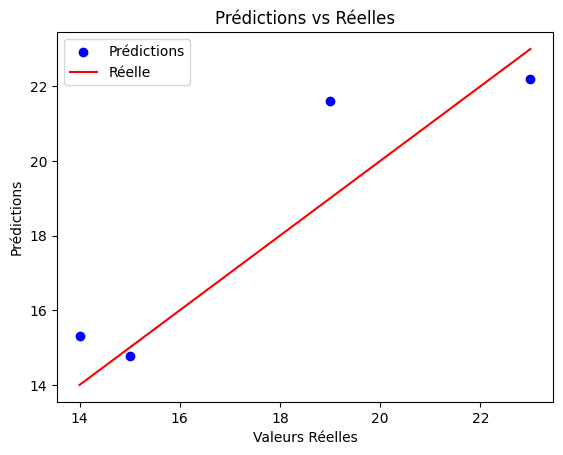

In [39]:
import matplotlib.pyplot as plt

# Tracer les valeurs réelles
plt.scatter(y_test, y_pred, color='blue', label='Prédictions')

# Tracer la droite de régression parfaite (pour comparer)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Réelle')

plt.title('Prédictions vs Réelles')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')
plt.legend()
plt.show()


In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Charger les données depuis un fichier CSV
data = pd.read_csv('newtemps.csv')

# Créer une colonne de date et heure complète
data['Datetime'] = pd.to_datetime(data[['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']])

# Diviser les données en ensemble d'entraînement et de test
X = data['Datetime'].astype(int).values.reshape(-1, 1)
y = data['Temperature'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner un modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Utiliser le modèle pour prédire les températures futures
nouvelles_predictions = model.predict(X_test)

# Identifier les températures anormales
df_predictions = pd.DataFrame({'Temperature': y_test, 'Predicted': nouvelles_predictions})
mean_temperature = df_predictions['Temperature'].mean()
std_temperature = df_predictions['Temperature'].std()
seuil_anomalie = 3 * std_temperature
temp_anormales = df_predictions[df_predictions['Temperature'] > (mean_temperature + seuil_anomalie)]

# Afficher les températures anormales
print("Températures anormales possibles :")
print(temp_anormales)


Températures anormales possibles :
Empty DataFrame
Columns: [Temperature, Predicted]
Index: []


In [56]:
import pandas as pd

# Charger les données depuis le fichier CSV (assurez-vous d'ajuster le chemin)
file_path = 'newtemps.csv'
data = pd.read_csv(file_path)

# Calculer la moyenne et l'écart-type des températures
mean_temp = data['Temperature'].mean()
std_dev_temp = data['Temperature'].std()

# Définir un seuil pour les températures anormales (par exemple, +/- 2 écarts-types)
threshold = 2 * std_dev_temp

# Identifier les températures anormales
anomalous_temps = data[abs(data['Temperature'] - mean_temp) > threshold]

# Afficher les températures considérées comme anormales
print("Températures considérées comme anormales :")
print(anomalous_temps[['Temperature', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']])


Températures considérées comme anormales :
    Temperature  Year  Month  Day  Hour  Minute  Second
5         22220  2023     12    2     9      15       0
15        14229  2023     12    4    11      45       0
